In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float, color
# import glymur # Requires installation and possibly OpenJPEG C library
import os
from coders import compress_jpeg2000, compress_spiht
from method import compress_adct_actual_with_rate_control, ADCTCCompressor
from utils import simulate_metrics_for_codec
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte


In [2]:
# --- Compute NOSB (Number of Significant Bits) ---
#def compute_nosb(value):
#   """Calculates the Number of Significant Bits for a given value."""
#    abs_val = abs(int(value))
#    if abs_val == 0:
#        return 0
#    # The number of bits required to represent an integer, excluding the sign bit.
#    # For example, 1 needs 1 bit (2^0), 2 needs 2 bits (2^1), 3 needs 2 bits (2^1), etc.
#    return int(np.floor(np.log2(abs_val))) + 1

#def compute_nosb_array(arr):
#    """Vectorized computation of NOSB for a NumPy array."""
#    vectorized_nosb = np.vectorize(compute_nosb)
#    return vectorized_nosb(arr)


# def compute_nosb_array(arr):
#     arr = np.abs(arr.astype(int))
#     with np.errstate(divide='ignore'):
#         nosb = np.where(arr == 0, 0, np.floor(np.log2(arr)) + 1)
#     return nosb.astype(int)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing fig1_b.png...
Error loading fig1_b.png: No such file: '/home/erfan/university/ip/projects/ip/fig1_b.png'
No data for JPEG2000 - psnr
No data for SPIHT - psnr
No data for ADCTC - psnr


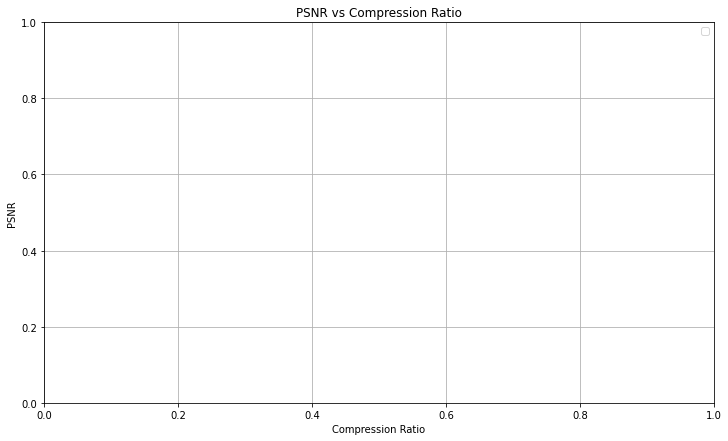

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No data for JPEG2000 - psnr_hvs
No data for SPIHT - psnr_hvs
No data for ADCTC - psnr_hvs


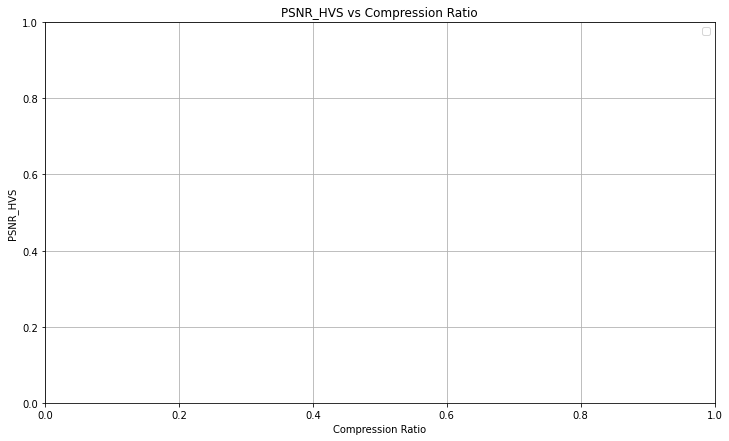

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No data for JPEG2000 - fsim
No data for SPIHT - fsim
No data for ADCTC - fsim


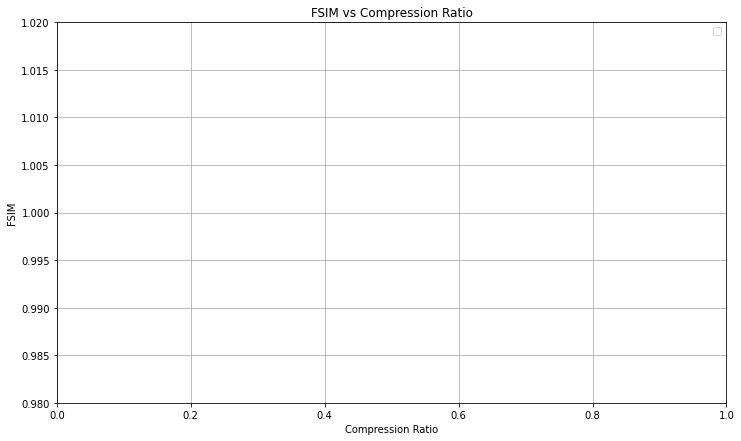

In [3]:
# --- Main Execution Block ---
if __name__ == "__main__":
    # Image paths for comparison (only one image for quick testing)
    image_paths = ["fig1_b.png"]  # Ensure this file exists in the same directory
    # Range of compression ratios for evaluation (fewer points for quick testing)
    cr_values = np.linspace(2, 40, 30) # 5 CR points from 2 to 40
    
    # Define the codecs to compare
    codecs = {
        'JPEG2000': compress_jpeg2000,
        'SPIHT': compress_spiht,
        'ADCTC': compress_adct_actual_with_rate_control 
        # 'ADCTC': lambda img, cr: compress_adct_fixed_qs(img, qs_val=12)

    }
    
    # Structure to store results
    results = {k: {'psnr': [], 'psnr_hvs': [], 'fsim': []} for k in codecs}

    # Main loop for processing each image
    for img_path in image_paths:
        try:
            print(f"Processing {img_path}...")
            image = io.imread(img_path)
            #image = add_realistic_noise(image * 255).astype(np.uint8)
            if image.ndim == 3: 
                image = color.rgb2gray(image) # Convert to grayscale if it's a color image
            image = img_as_float(image) # Convert to float for processing (0-1 range)
            
            for name, func in codecs.items():
                print(f"  Testing {name}...")
                try:
                    p, p_hvs, f = simulate_metrics_for_codec(image, cr_values, func)
                    results[name]['psnr'].append(p)
                    results[name]['psnr_hvs'].append(p_hvs)
                    results[name]['fsim'].append(f)
                except Exception as e:
                    print(f"Error in {name}: {str(e)}")
                    continue # Continue to the next codec if an error occurs
                    
        except Exception as e:
            print(f"Error loading {img_path}: {str(e)}")
            continue # Continue to the next image if an error occurs

    # --- Plotting the graphs for each metric ---
    for metric in ['psnr', 'psnr_hvs', 'fsim']:
        plt.figure(figsize=(12,7)) 
        for name in codecs:
            if not results[name][metric]:
                print(f"No data for {name} - {metric}")
                continue
            
            # Calculate the average metric values across all processed images (if multiple)
            # np.nanmean handles potential NaN values from errors during compression
            avg = np.nanmean(results[name][metric], axis=0) 
            plt.plot(cr_values, avg, label=f"{name}", marker='o')
        
        plt.title(f"{metric.upper()} vs Compression Ratio")
        plt.xlabel("Compression Ratio")
        plt.ylabel(metric.upper())
        plt.grid(True)
        plt.legend()
        if metric == 'fsim':
            plt.ylim([0.98, 1.02])  # Appropriate y-axis range for FSIM (typically 0 to 1)
        plt.show()

In [4]:
# --- Visualize Block Partitioning for One Image ---
if True:  # ← Set to True to enable or False to disable
    print("\n Visualizing block partitioning on example image...")
    test_image = imread("sample_image.png")  # Load the test image
    if test_image.ndim == 3:
        test_image = rgb2gray(test_image)  # Convert to grayscale if RGB
    test_image = img_as_ubyte(test_image)  # Convert to uint8 format

    compressor = ADCTCCompressor(QS=12)  # Choose any desired QS value
    recon_img, bits, cr, vis_img = compressor.compress(test_image)

    plt.subplot(1, 2, 1)
    plt.imshow(test_image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(recon_img, cmap='gray')
    plt.title(f"Reconstructed (CR ≈ {cr:.2f})")
    plt.axis('off')

    plt.figure(figsize=(10, 8))
    plt.imshow(vis_img, cmap='gray')
    plt.title(f"ADCTC Block Partitioning (CR ≈ {cr:.2f})")
    plt.axis('off')
    plt.show()



 Visualizing block partitioning on example image...


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mnon-precise type pyobject[0m
[0m[1mDuring: typing of argument at /home/erfan/university/ip/projects/ip/method.py (27)[0m
[1m
File "method.py", line 27:[0m
[1mdef compute_nosb_array(arr):
    <source elided>

[1m@njit
[0m[1m^[0m[0m 

This error may have been caused by the following argument(s):
- argument 2: [1mCannot determine Numba type of <class 'sage.rings.integer.Integer'>[0m
